# Template Notebook

## Setup

### Standard library imports

In [50]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

In [65]:
%autoreload 2

import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from source.spea_optimizer import SPEAOptimizer
from source.objectives import polonis_objective

In [53]:
sns.set()

### Setup objective function

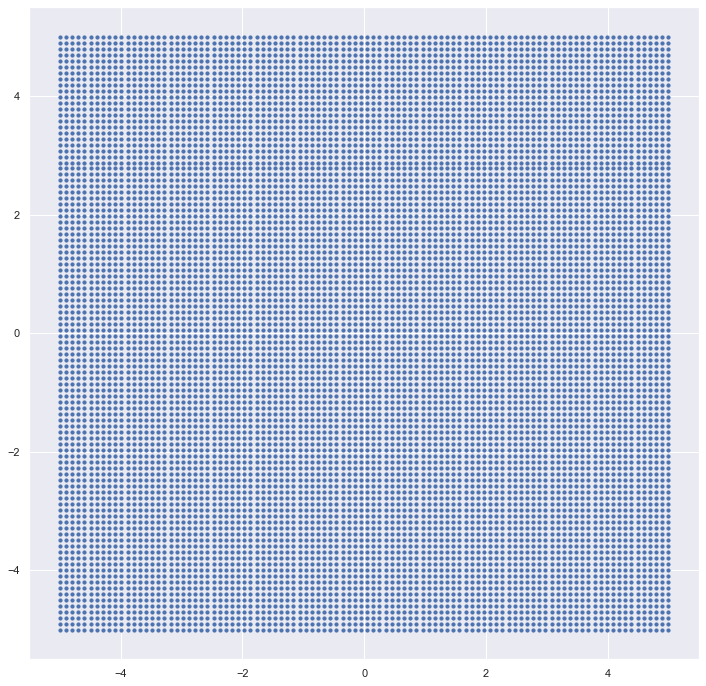

In [66]:
plt.figure(figsize=[12, 12])

x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100), sparse=False, indexing='xy')
plt.scatter(x, y, c="b", s=10)

In [68]:
grid = np.array([x, y])
grid = grid.reshape(2, 100*100)
grid = np.swapaxes(grid, 0, 1)
grid.shape

(10000, 2)

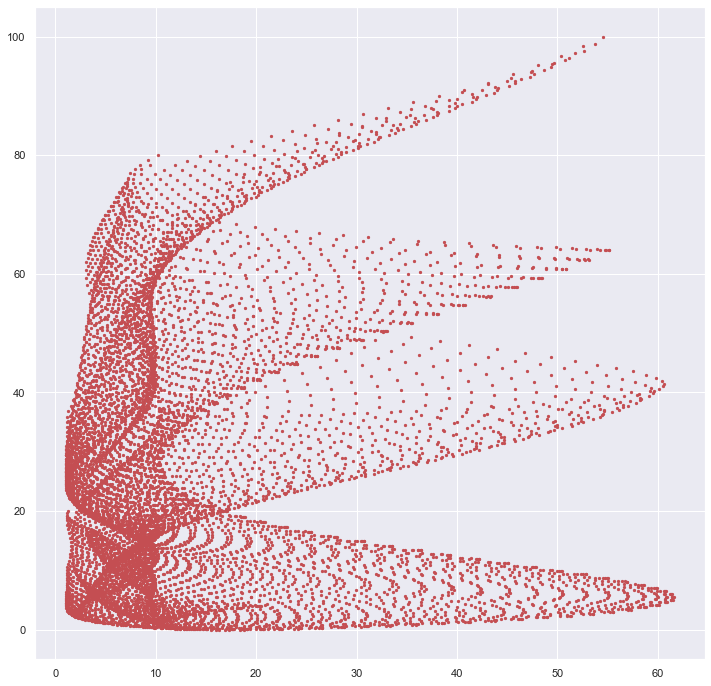

In [70]:
plt.figure(figsize=[12, 12])

values = np.apply_along_axis(polonis_objective, 1, grid)
plt.scatter(values[:, 0], values[:, 1], c="r", s=5)

In [71]:
optimzier = SPEAOptimizer(
    polonis_objective,
    n_dim=2,
    mode="min",
    mutation_operator="gaussian",
    crossover_operator="center",
    selection_operator="binary_tournament",
    clustering_method="affinity_propagation"
)

In [72]:
history = optimzier.optimize(
    generations=200,
    population_size=100,
    crossover_rate=0.8,
    mutation_rate=0.4,
    reducing_period=1,
    search_range=((-5, 10),),
    mutation_strength=1,
    clustering_parameters={"max_iter": 50},
    silent=False,
    mutation_schedule="const",
    crossover_schedule="const",
    strength_schedule=lambda generation, factor, n_generations: 1 + 0.05*generation,
    logging=False,
    logging_path=r"../data/poloni_logs.csv",
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:32<00:00,  6.12it/s]


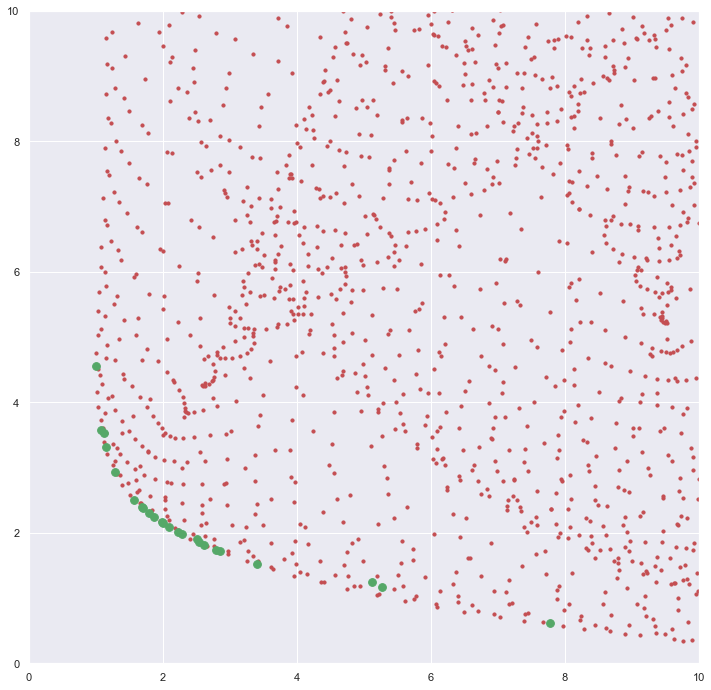

In [75]:
plt.figure(figsize=[12, 12])

pareto_values = np.apply_along_axis(objective, 1, optimzier.pareto_front)

plt.scatter(values[:, 0], values[:, 1], c="r", s=10)
plt.scatter(pareto_values[:, 0], pareto_values[:, 1], c="g", s=60)

_ = plt.xlim([0, 10])
_ = plt.ylim([0, 10])

In [74]:
optimzier.pareto_front.tolist()

[[-3.6471708513980867, 0.3172490076960455],
 [-3.5643799359125334, 0.28771473298100025],
 [-4.004488352480945, 0.6013621919105909],
 [-3.3114133660625296, -0.28311971048090434],
 [-3.5633397302036314, 0.09445553663911678],
 [-3.612717220183473, 0.38697717416718574],
 [-3.7039668273889195, 0.37747031024542527],
 [-3.4273624117827723, 0.3120579837869055],
 [-3.588474968439052, 0.18191820063560962],
 [-3.700089253595931, -1.0093523799056445],
 [-3.6135517581950567, 0.3644683824107121],
 [-3.6295962782057765, 0.30312581748992345],
 [-3.61534615949876, 0.16036136148645574],
 [-3.7773646821260263, -0.1943495524702259],
 [-3.875851958045433, 0.4741540278948051],
 [-3.6438785325689085, 0.4005418143033134],
 [-3.345550335483834, -0.665733532768931],
 [-4.243425616875748, 0.736211911413529],
 [-3.6731680989418187, 0.4328375481231528],
 [-3.9773273241912905, 0.53498547312265],
 [-3.615502055586615, 0.21551522255090327],
 [-3.6573300181629844, 0.31395998440094874],
 [-3.5588369163583184, 0.3017485